<a href="https://colab.research.google.com/github/byOKO/NASA-Bearing-Data-set_EDA/blob/main/2nd_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')
print(" Current Working Directory")
% pwd

 Current Working Directory


'/content'

In [ ]:
# Common imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1Ug0DuVgFhWU0syGtC6zlY80fPvgAQHxa'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('2nd_test.zip')
print('Downloaded Data File')

Downloaded Data File


In [ ]:
!unzip 2nd_test.zip

Archive:  2nd_test.zip
   creating: 2nd_test/
  inflating: 2nd_test/2004.02.12.10.32.39  
  inflating: 2nd_test/2004.02.12.10.42.39  
  inflating: 2nd_test/2004.02.12.10.52.39  
  inflating: 2nd_test/2004.02.12.11.02.39  
  inflating: 2nd_test/2004.02.12.11.12.39  
  inflating: 2nd_test/2004.02.12.11.22.39  
  inflating: 2nd_test/2004.02.12.11.32.39  
  inflating: 2nd_test/2004.02.12.11.42.39  
  inflating: 2nd_test/2004.02.12.11.52.39  
  inflating: 2nd_test/2004.02.12.12.02.39  
  inflating: 2nd_test/2004.02.12.12.12.39  
  inflating: 2nd_test/2004.02.12.12.22.39  
  inflating: 2nd_test/2004.02.12.12.32.39  
  inflating: 2nd_test/2004.02.12.12.42.39  
  inflating: 2nd_test/2004.02.12.12.52.39  
  inflating: 2nd_test/2004.02.12.13.02.39  
  inflating: 2nd_test/2004.02.12.13.12.39  
  inflating: 2nd_test/2004.02.12.13.22.39  
  inflating: 2nd_test/2004.02.12.13.32.39  
  inflating: 2nd_test/2004.02.12.13.42.39  
  inflating: 2nd_test/2004.02.12.13.52.39  
  inflating: 2nd_test/2004.02.

In [ ]:
os.rename('2nd_test','data')

In [ ]:
data_dir = 'data'
merged_data = pd.DataFrame()

# Looping over all files from 12th Feb to 19th Feb
for filename in os.listdir(data_dir):
  dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
  dataset_mean_abs = np.array(dataset.abs().mean())
  dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
  dataset_mean_abs.index = [filename]
  merged_data = merged_data.append(dataset_mean_abs)

#Renaming columns
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
#identifying index as datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')

In [ ]:
#Check -Bearing of Data
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


In [ ]:
#Check - End of Data
merged_data.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


In [ ]:
#Check Total Points
print(f'Total Data Points {merged_data.shape[0]}')

Total Data Points 984


Text(2004-02-19 06:12:39, 0.3, 'Breakdown of Bearing 1')

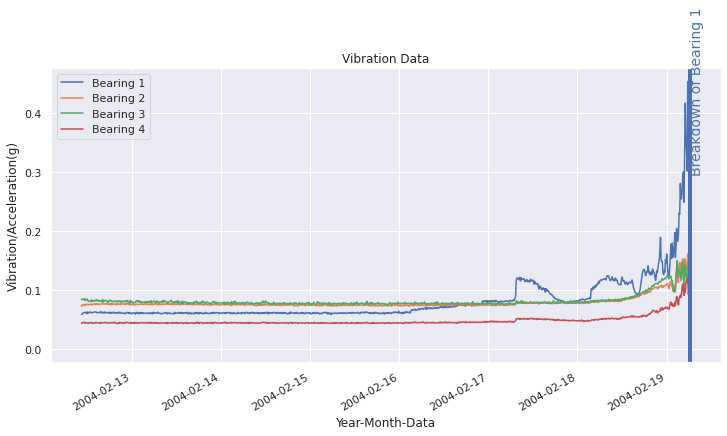

In [ ]:
#Visualising Data
ax = merged_data.plot(figsize = (12, 6), title="Vibration Data", legend = True)
ax.set(xlabel="Year-Month-Data", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2004-02-19 06:12:39', linewidth=4, color='b', label ="Breakdown of Bearing 1")
plt.text('2004-02-19 06:12:39',0.3,'Breakdown of Bearing 1',rotation=90, fontsize=14, color='b')

[Text(0, 0.5, 'Vibration/Acceleration(g)'), Text(0.5, 0, 'Month-Date Time')]

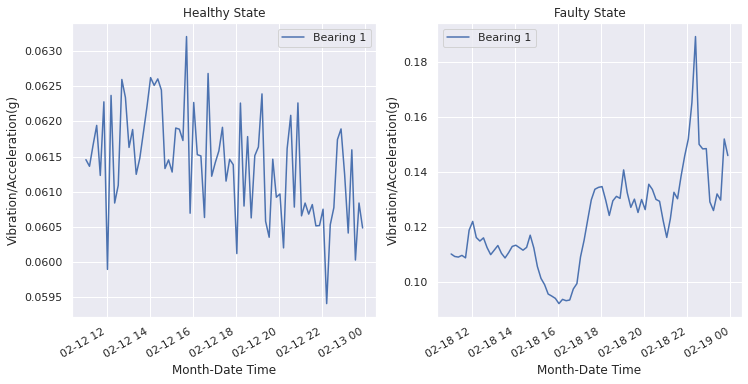

In [ ]:
fig = plt.figure()

#Divide the figure into a 1x2 grid, and give me the first section 
ax1 = fig.add_subplot(121)
#Divide the figure into a 1x2 grid, and give me the second section 
ax2=fig.add_subplot(122)

healthy = merged_data['2004-02-12 11:02:39':'2004-02-12 23:52:39']
healthy['Bearing 1'].plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data['2004-02-18 11:02:39':'2004-02-18 23:52:39']
ax2 = faulty['Bearing 1'].plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")